In [9]:
import numpy as np
import matplotlib
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [144]:
rng = np.random.RandomState(123)
d = 2
N = 10
mean = 5
x1 = rng.randn(N, d) + np.array([0, 0])
x2 = rng.randn(N, d) + np.array([mean, mean])
x = np.concatenate((x1, x2), axis=0)
x_df = pd.DataFrame(x, columns = ['x', 'y'])
x_df['Distribution'] = N*['N1'] + N*['N2']
x_df.head()
g = sns.lmplot(x='x', y='y', data=x_df, hue='Distribution', markers=["o", "^"], fit_reg=False)

,x,y,Distribution
0,-1.085631,0.997345,N1
1,0.282978,-1.506295,N1
2,-0.578600,1.651437,N1
3,-2.426679,-0.428913,N1
4,1.265936,-0.866740,N1


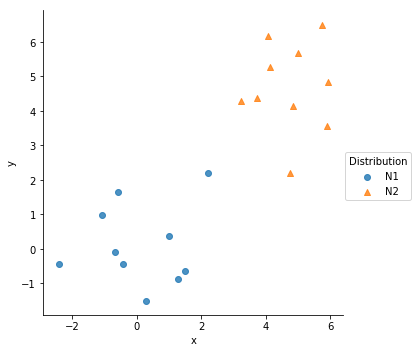

In [139]:
g = sns.lmplot(x='x', y='y', data=x_df, hue='Distribution', markers=["o", "^"], fit_reg=False)

# LDA approach (see PRML 4.2.1)

In [93]:
mu1 = np.sum(x1, axis=0)/N
mu2 = np.sum(x2, axis=0)/N
S1 = np.tensordot((x1 - mu1).T, (x1 - mu1), axes=1)/N
S2 = np.tensordot((x2 - mu2).T, (x2 - mu2), axes=1)/N
mu = (mu1 + mu2)/2
S = (S1 + S2)/2

The Fisher criterion (4.38) tells us that the separation line is in the direction $w \propto S^{-1}(\mu_2 - \mu_1) $ 


The hyperplane is then defined as $w^T(x - \mu) > 0$

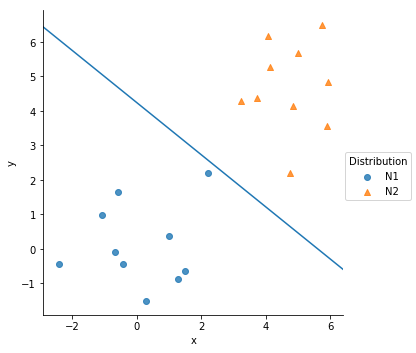

In [140]:
w = np.linalg.inv(S).dot(mu2 - mu1)
w = w/np.linalg.norm(w)
xl = g.ax.get_xlim()[0] # The lowest value on the x axis will be used to calculate the high y point
yl = g.ax.get_ylim()[0]

l = matplotlib.lines.Line2D([xl, (w.dot(mu) - xl*w[0])/w[1]],[(w.dot(mu) - yl*w[1])/w[0], yl])
g.ax.add_line(l)
g.fig